# Отчёт по производительности для задания №6 (OpenMP)


In [1]:
import re
import pandas as pd
from pathlib import Path

text = Path("../Results/6_log.txt").read_text(encoding="utf-8")
pd.set_option('display.max_rows', 150)

size_re = re.compile(r"Vector size:\s*(\d+)")
schedule_re = re.compile(r"Schedule:\s*(\w+)")
threads_re = re.compile(r"Threads:\s*(\d+)")
time_re = re.compile(r"Time:\s*([\d.]+)\s*ms\s*\(speedup:\s*([\d.]+)x,\s*efficiency:\s*([\d.]+)\)")

records = []
current_size = None
current_schedule = None

lines = text.splitlines()
i = 0
while i < len(lines):
    line = lines[i].strip()

    if line.startswith("Vector size:"):
        m = size_re.search(line)
        if m:
            current_size = int(m.group(1))
        i += 1
        continue

    if line.startswith("Schedule:"):
        m = schedule_re.search(line)
        if m:
            current_schedule = m.group(1)
        i += 1
        continue

    m_threads = threads_re.search(line)
    if m_threads:
        threads = int(m_threads.group(1))
        i += 1
        if i < len(lines):
            m_time = time_re.search(lines[i].strip())
            if m_time:
                time_ms = float(m_time.group(1))
                speedup = float(m_time.group(2))
                efficiency = float(m_time.group(3))
                records.append({
                    'size': current_size,
                    'schedule': current_schedule,
                    'threads': threads,
                    'time_ms': time_ms,
                    'speedup': speedup,
                    'efficiency': efficiency
                })
        i += 1
        continue

    i += 1

df = pd.DataFrame(records)
print(f"Rows: {len(df)}")
df

Rows: 54


,size,schedule,threads,time_ms,speedup,efficiency
0,10000,static,1,26.44110,1.00000,1.000000
1,10000,static,2,12.27290,2.15444,1.077220
2,10000,static,4,6.18039,4.27823,1.069560
3,10000,static,6,4.24547,6.22807,1.038010
4,10000,static,8,3.51278,7.52712,0.940890
5,10000,static,12,2.79469,9.46118,0.788432
6,10000,dynamic,1,24.50520,1.00000,1.000000
7,10000,dynamic,2,12.29380,1.99329,0.996646
8,10000,dynamic,4,6.18821,3.95999,0.989997
9,10000,dynamic,6,4.22028,5.80655,0.967758


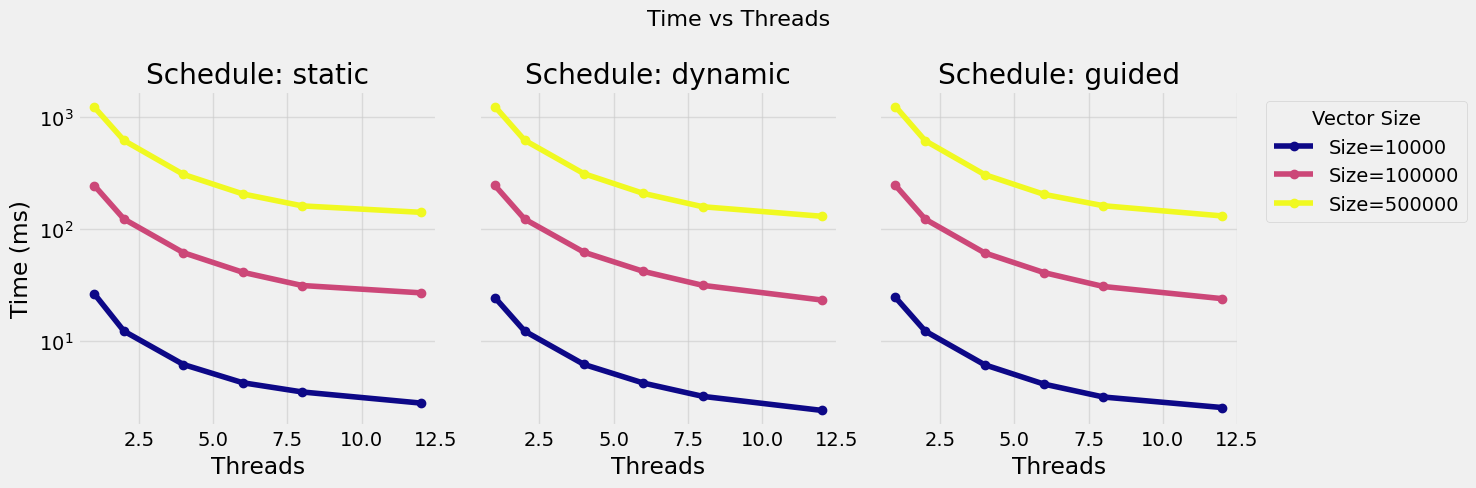

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')
unique_schedules = df['schedule'].unique()
unique_sizes = sorted(df['size'].unique())
labels = [f"{s}" for s in unique_sizes]
colors = plt.cm.plasma(np.linspace(0, 1, len(unique_sizes)))

fig, axs = plt.subplots(1, len(unique_schedules), figsize=(15, 5), sharey=True)
if len(unique_schedules) == 1:
    axs = [axs]

for col_idx, schedule in enumerate(unique_schedules):
    ax = axs[col_idx]
    for idx, size in enumerate(unique_sizes):
        sub = df[(df['schedule'] == schedule) & (df['size'] == size)].sort_values('threads')
        ax.plot(sub['threads'], sub['time_ms'], 'o-', color=colors[idx], label=f"Size={size}")
    ax.set_title(f'Schedule: {schedule}')
    ax.set_xlabel('Threads')
    if col_idx == 0:
        ax.set_ylabel('Time (ms)')
    ax.set_yscale('log')
    ax.grid(True, alpha=0.6)

axs[-1].legend(title='Vector Size', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.suptitle('Time vs Threads', fontsize=16)
plt.tight_layout()
plt.show()


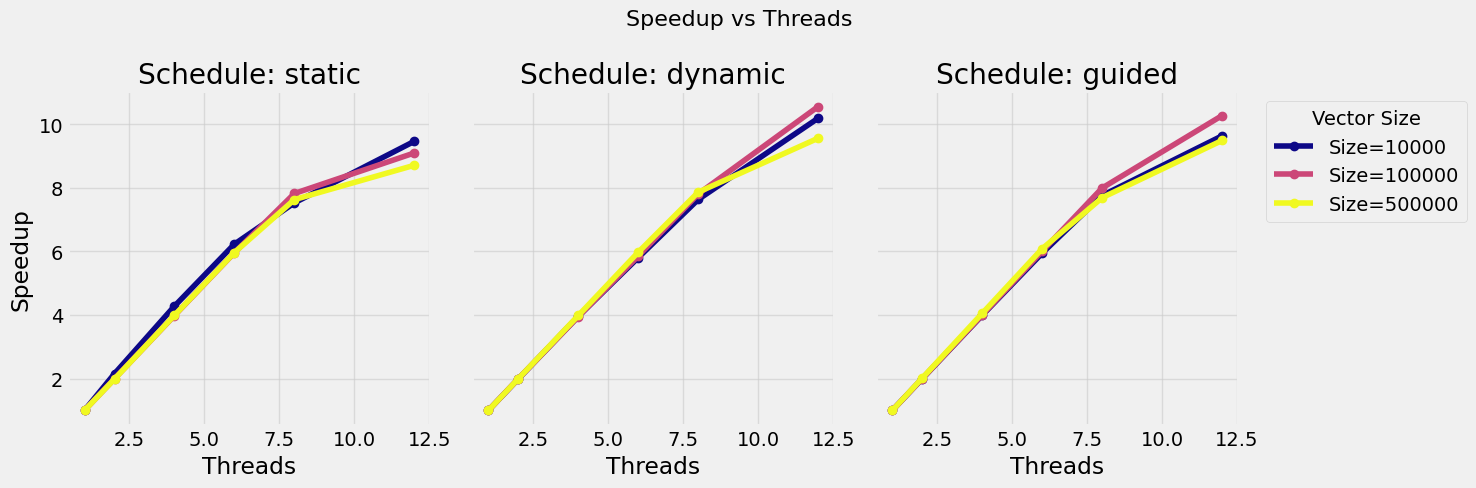

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

unique_schedules = df['schedule'].unique()
unique_sizes = sorted(df['size'].unique())
labels = [f"{s}" for s in unique_sizes]
colors = plt.cm.plasma(np.linspace(0, 1, len(unique_sizes)))

fig, axs = plt.subplots(1, len(unique_schedules), figsize=(15, 5), sharey=True)
if len(unique_schedules) == 1:
    axs = [axs]

for col_idx, schedule in enumerate(unique_schedules):
    ax = axs[col_idx]
    for idx, size in enumerate(unique_sizes):
        sub = df[(df['schedule'] == schedule) & (df['size'] == size)].sort_values('threads')
        ax.plot(sub['threads'], sub['speedup'], 'o-', color=colors[idx], label=f"Size={size}")
    ax.set_title(f'Schedule: {schedule}')
    ax.set_xlabel('Threads')
    if col_idx == 0:
        ax.set_ylabel('Speedup')
    ax.grid(True, alpha=0.6)

axs[-1].legend(title='Vector Size', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.suptitle('Speedup vs Threads', fontsize=16)
plt.tight_layout()
plt.show()


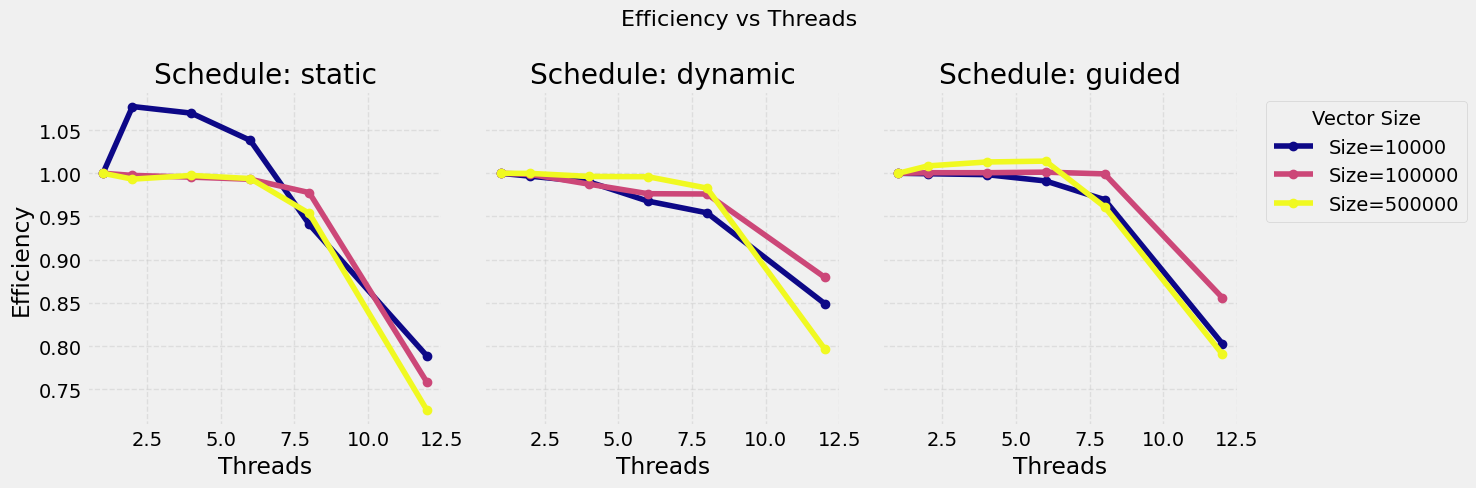

In [6]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')
unique_schedules = df['schedule'].unique()
unique_sizes = sorted(df['size'].unique())
labels = [f"{s}" for s in unique_sizes]
colors = plt.cm.plasma(np.linspace(0, 1, len(unique_sizes)))

fig, axs = plt.subplots(1, len(unique_schedules), figsize=(15, 5), sharey=True)
if len(unique_schedules) == 1:
    axs = [axs]

for col_idx, schedule in enumerate(unique_schedules):
    ax = axs[col_idx]
    for idx, size in enumerate(unique_sizes):
        sub = df[(df['schedule'] == schedule) & (df['size'] == size)].sort_values('threads')
        ax.plot(sub['threads'], sub['efficiency'], 'o-', color=colors[idx], label=f"Size={size}")
    ax.set_title(f'Schedule: {schedule}')
    ax.set_xlabel('Threads')
    if col_idx == 0:
        ax.set_ylabel('Efficiency')
    ax.grid(True, alpha=0.5, linestyle='--')

axs[-1].legend(title='Vector Size', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.suptitle('Efficiency vs Threads', fontsize=16)
plt.tight_layout()
plt.show()
